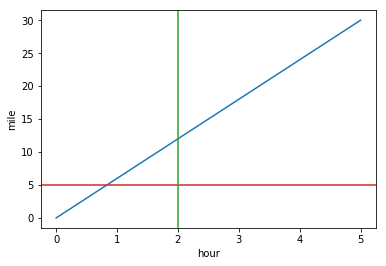

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pint

ureg = pint.UnitRegistry()
ureg.setup_matplotlib(True)


y = np.linspace(0, 30) * ureg.miles
x = np.linspace(0, 5) * ureg.hours

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * ureg.feet, color='tab:red')
ax.axvline(120 * ureg.minutes, color='tab:green')

In [35]:
import math

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from pint import UnitRegistry

u = UnitRegistry()
u.setup_matplotlib(True)
u.load_definitions('/home/diego/Documentos/mn-ryr/mis-defs.txt')

from decimal import Decimal

In [4]:
def nucleos_radiactivos(nuc_inicio, ti, tf, lmbd):
    """
Ley de decaimiento radiactivo.

:param nuc_inicio: es el número de nucleos radiactivos en el momento inicial
:param ti: es el tiempo de referencia, en el cual hay un número de nucleos igual a nuc_inicio 
:param tf: es el tiempo en el cual se calcula el número de nucleos actual 
:returns: el número de nucleos en el tiempo tf
"""
    return nuc_inicio * math.exp(-lmbd*(tf-ti))

def actividad(t_ref, act_ref, t, lmbd):
    delta_t = t-t_ref
    return act_ref * math.exp(-lmbd*delta_t)

def despejar_lmbd(ti, valor_inicial, tf, valor_final):
    # obtiene lambda a partir de pares de valor de tiempo y nucleos radiactivos / tiempo y actividad
    # por ejemplo: ti = 4, tf = 8, act_i = 852, act_f = 712 ===> lmbd = 
    return (1/(ti-tf))*math.log(valor_final/valor_inicial)

def obtener_semiperiodo(lmbd):
    return math.log(2)/lmbd

def obtener_lmbd(semiperiodo):
    return math.log(2)/semiperiodo

## Problema 1 en preparación

Vamos a trabajar con el Cu-62, tiene un semiperíodo de desintegración de 9.74 minutos. Sugongamos que la muestra tiene 5 picogramo de Cu-62. 

62 g ---> 1 mol de Cu-62

5 pg ---> x

Por lo tanto:

N = 5e^-12 * 6.023e^23 / 62 [nucleos de Cu-62]

In [60]:
N_0 = 5e-12 * 6.023e23/62

In [61]:
Cu62_semiperiodo = 9.74 * u.minutes
lmbd = obtener_lmbd(Cu62_semiperiodo)
lmbd

0.07116500827104161 1/minute

### Cálculo de la actividad de la muestra

$A_0 = N_0 \; \lambda$

In [66]:
A0 = N_0 * lmbd
A0.ito('MBq')
A0

57.61113505597898 megaBq

### Cálculo de la actividad en horas posteriores:

In [65]:
t0=0 * u.min
t1=5 * u.min
t2=10 * u.min
t3=15 * u.min
t4=20 * u.min
t5=25 * u.min

A_05 = actividad(t0,A0,t1,lmbd)
A_05

40.36208380515582 megaBq

In [73]:
for t in range(1, 6):
    A=actividad(t0,A0,t*5*u.min,lmbd)
    print(5*t,A)

5 40.36208380515582 megaBq
10 28.27748155823483 megaBq
15 19.81106741506167 megaBq
20 13.879538434702743 megaBq
25 9.723937793171707 megaBq
